# Traffic Time Series

## The Dataset

In [1]:
#import all the things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#this is just to see what all the columns look like
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
#look at the dataset
traffic_df = pd.read_csv('trafficviolations_2019.csv')
traffic_df.head()

/Users/Sahil/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (20,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,02 - Automobile,2014.0,HONDA,CIVIC,BLACK,Warning,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2016.0,FORD,TK,BLACK,Warning,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,06 - Heavy Duty Truck,2018.0,HINO,TRUCK,WHITE,Warning,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,22-204(f),NaN,NaN,MD,02 - Automobile,2006.0,VOLV,4S,WHITE,Warning,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2008.0,HONDA,CIVIC,BLACK,Warning,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [3]:
#the names of the columns
traffic_df.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [4]:
#convenietly, the time variables needed to make a DateTime are right there
traffic_df['DateTime'] = pd.to_datetime(traffic_df['Date Of Stop'] + " "+ traffic_df['Time Of Stop'])
traffic_df[['DateTime']].head()

,DateTime
0,2019-07-30 22:15:00
1,2019-07-07 22:54:00
2,2019-07-10 16:00:00
3,2019-08-15 22:42:00
4,2019-04-15 05:49:00


In [5]:
#indexing based on DateTime makes plotting easier
traffic_df = traffic_df.set_index('DateTime')
traffic_df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-30 22:15:00,02ccadf1-7ebd-48d8-a793-913e3198f52a,2019-07-30,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,02 - Automobile,2014.0,HONDA,CIVIC,BLACK,Warning,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
2019-07-07 22:54:00,3b060228-d664-4480-9314-6188ee8ac891,2019-07-07,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2016.0,FORD,TK,BLACK,Warning,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2019-07-10 16:00:00,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,2019-07-10,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,06 - Heavy Duty Truck,2018.0,HINO,TRUCK,WHITE,Warning,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
2019-08-15 22:42:00,abd509c6-edb3-4818-b90a-477cf92755e6,2019-08-15,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,No,No,No,No,No,No,No,No,No,No,NaN,Warning,NaN,22-204(f),NaN,NaN,MD,02 - Automobile,2006.0,VOLV,4S,WHITE,Warning,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
2019-04-15 05:49:00,021d5a2d-7989-4b52-a983-7f6e462fc123,2019-04-15,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2008.0,HONDA,CIVIC,BLACK,Warning,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [6]:
#many of these fields are redundant, empty, or contain strings that are unique to that row
#year is for the year of the car, not year of the traffic stop, but removing it makes the plots easier to use
traffic_df2 = traffic_df.drop(columns = ['SeqID', 'Date Of Stop', 'Time Of Stop', 'Description', 'Location', 
                                         'Latitude', 'Longitude', 'Search Conducted', 'Search Disposition', 
                                         'Search Outcome', 'Search Reason', 'Search Reason For Stop', 'Search Type', 
                                         'Search Arrest Reason', 'Geolocation', 'Year'])
traffic_df2.head()

,Agency,SubAgency,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-30 22:15:00,MCP,"2nd District, Bethesda",No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,HONDA,CIVIC,BLACK,Warning,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser
2019-07-07 22:54:00,MCP,"4th District, Wheaton",No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,FORD,TK,BLACK,Warning,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol
2019-07-10 16:00:00,MCP,"1st District, Rockville",No,No,No,No,No,No,No,No,No,No,MD,06 - Heavy Duty Truck,HINO,TRUCK,WHITE,Warning,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol
2019-08-15 22:42:00,MCP,"2nd District, Bethesda",No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,VOLV,4S,WHITE,Warning,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol
2019-04-15 05:49:00,MCP,"5th District, Germantown",No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,HONDA,CIVIC,BLACK,Warning,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol


In [7]:
#to track the frequency of traffic stops numerically, a column of just ones can be used. there's probably a more elegant way to do this
#the other variable being looked at "Contributed to Accident" is a boolean, which python treats as 0 or 1
traffic_df2['Incident'] = 1

## Visualization

### Weekly

In [8]:
#condensing the data into weeks to make it easier to read over the course of the year

#sum can be used to track how many traffic stops occurred and how many stops based on an accident occurred
weekly_sum = traffic_df2.resample('W').sum()
#mean can be used to track what proportion of stops were based on accidents, however, average traffic stops per traffic stop will always be 1
weekly_mean = traffic_df2.resample('W').mean()

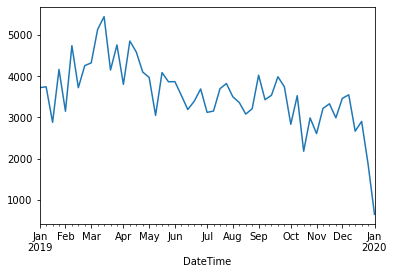

In [9]:
#How many traffic stops occurred each week. 
#It appears to vary over the course of the year, but the data has a lot of noise
weekly_sum['Incident'].plot()

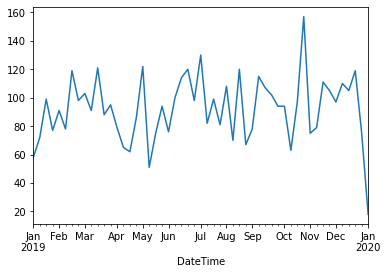

In [10]:
#How many traffic stops based on an accident occurred each week.
#There appear to be no specific trends at this resolution, so traffic accidents may not be dependent on time of year.
weekly_sum['Contributed To Accident'].plot()

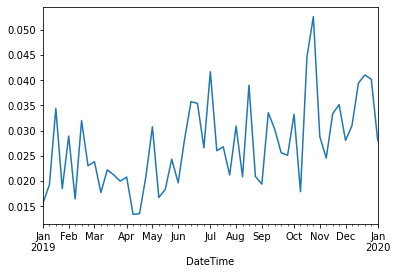

In [11]:
#The proportion of stops based on an accident each week.
#Possibly shows an inverse relationship to the number of traffic stops.
weekly_mean['Contributed To Accident'].plot()

### Monthly

In [12]:
#smoothing out the lines by sampling by months instead of weeks
monthly_sum = traffic_df2.resample('M').sum()
monthly_mean = traffic_df2.resample('M').mean()

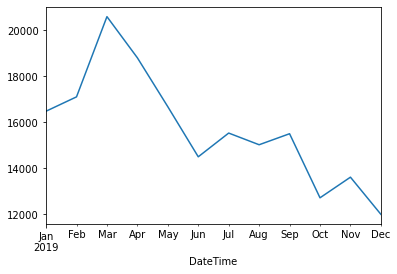

In [13]:
#How many traffic stops occurred each month. 
#it is now much clearer that there are more traffic stops in the warm months than in the cold months
monthly_sum['Incident'].plot()

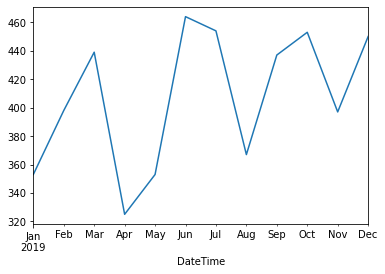

In [14]:
#How many traffic stops based on an accident occurred each month.
#the number of accidents varies, but is mostly between 320 and 460, so could be normally distributed, centered on 390
monthly_sum['Contributed To Accident'].plot()

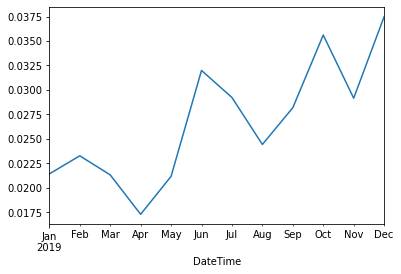

In [15]:
#The proportion of stops based on an accident each month.
#now it can be seen that proportion of stops due to accidents is inversely proportional to number of stops
monthly_mean['Contributed To Accident'].plot()

### Hourly

In [16]:
#indexing by hour shows the data by time of day, irrespective of the day of year
#this may show if  traffic stops or accidents are more common at different times
by_hour_sum = traffic_df2.groupby(traffic_df2.index.hour).sum()
by_hour_mean = traffic_df2.groupby(traffic_df2.index.hour).mean()

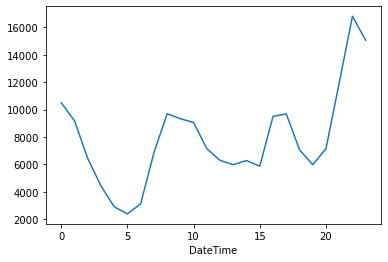

In [17]:
#How many traffic stops occurred each hour. 
#the number of traffic stops is highest at night, around 8am, and 5pm and lowest in the early morning and in the middle of the day
by_hour_sum['Incident'].plot()

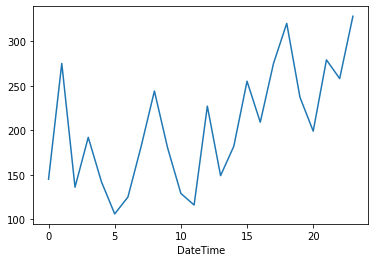

In [18]:
#How many traffic stops based on an accident occurred each hour.
#The number of stops due to accidents varies from 100 to 300 with a possible trend to more accidents in the evening and night
by_hour_sum['Contributed To Accident'].plot()

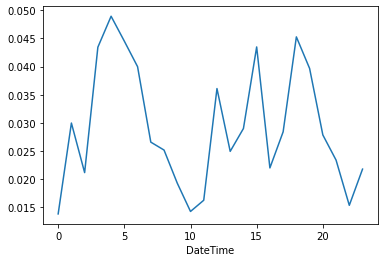

In [19]:
#The proportion of stops based on an accident each hour.
#Theres a big peak around 5am and some smaller peaks in the afternoon when more of the stops are due to accidents
by_hour_mean['Contributed To Accident'].plot()

### By Day of the Week

In [20]:
#indexing by weekday shows the data by day of the week, irrespective of when the week was in the year
by_weekday_sum = traffic_df2.groupby(traffic_df2.index.dayofweek).sum()
by_weekday_mean = traffic_df2.groupby(traffic_df2.index.dayofweek).mean()

#apparently the indexing uses 0-6, but that can be fixed
by_weekday_sum.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday_mean.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

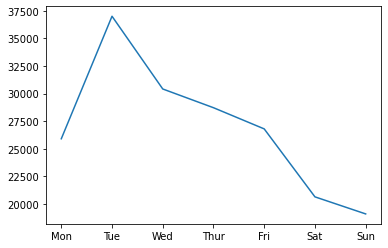

In [21]:
#How many traffic stops occurred each day of the week. 
#traffic stops peak on tuesday and decrease as the week goes on, before rising again every tuesday
#why
by_weekday_sum['Incident'].plot()

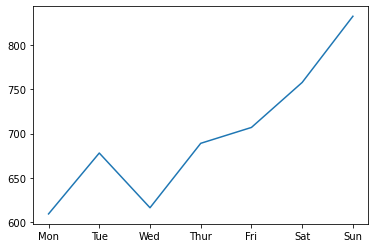

In [22]:
#How many traffic stops based on an accident occurred each day of the week.
#however, the number of stops due to accident go up over the course of the weekend, while being lower on the weekdays
by_weekday_sum['Contributed To Accident'].plot()

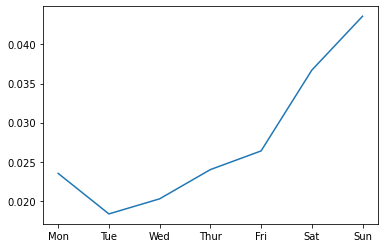

In [23]:
#The proportion of stops based on an accident each day of the week.
#both of these trends accumulate to show that a greater proportion of traffic stops are due to accidents on the weekend
#not only are there more accidents, but there are fewer traffic stops in general on the weekend
by_weekday_mean['Contributed To Accident'].plot()

In [24]:
#now sort the days into weekdays and weekends to see what those days are like
weekdays = np.where(traffic_df2.index.weekday < 5, 'Weekday', 'Weekend')

by_weektime_sum = traffic_df2.groupby([weekdays, traffic_df2.index.hour]).sum()
by_weektime_mean = traffic_df2.groupby([weekdays, traffic_df2.index.hour]).mean()

### Hourly on Weekdays

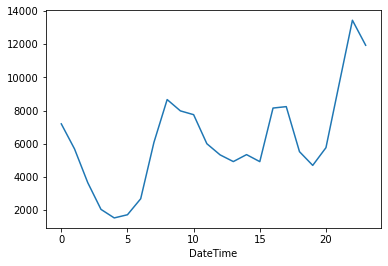

In [25]:
#How many traffic stops occurred each hour on weekdays. 
#as expected, weekdays are the basis for the trend present earlier for days in general
by_weektime_sum['Incident'].loc['Weekday'].plot()

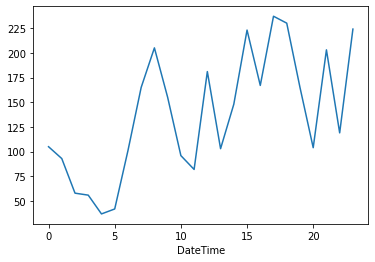

In [26]:
#How many traffic stops based on an accident occurred each hour on weekdays.
#the number of accidents during weekdays is generally higher at any time other than the early morning
by_weektime_sum['Contributed To Accident'].loc['Weekday'].plot()

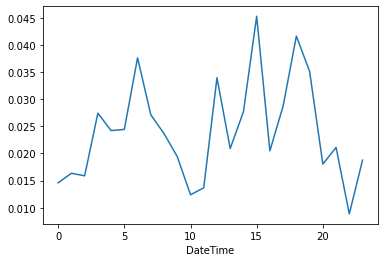

In [27]:
#The proportion of stops based on an accident each hour on weekdays.
#as such the proportion of stops due to accidents is highest when there are accidents but the number of stops in general is low
by_weektime_mean['Contributed To Accident'].loc['Weekday'].plot()

### Hourly on Weekends

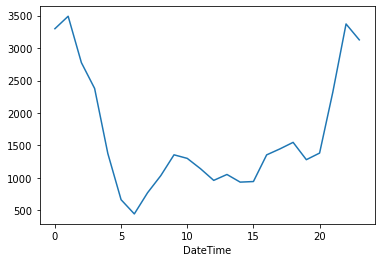

In [28]:
#How many traffic stops occurred each hour on weekends. 
#on weekends, most of the stops are at night
by_weektime_sum['Incident'].loc['Weekend'].plot()

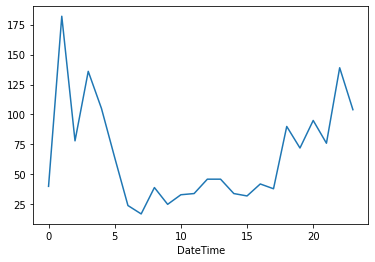

In [29]:
#How many traffic stops based on an accident occurred each hour on weekends.
#on weekends, most of the accidents are at night
by_weektime_sum['Contributed To Accident'].loc['Weekend'].plot()

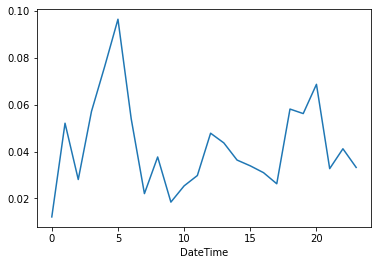

In [30]:
#The proportion of stops based on an accident each hour on weekends.
#on weekends, more of the stops are due to accidents at night
by_weektime_mean['Contributed To Accident'].loc['Weekend'].plot()

### Conclusion

Based on these visualizations, the police are more active on Tuesdays in warm months. They are typically more active at night and during commuting hours on weekdays. Accidents are more common during the day on weekdays and during the night on weekends. This analysis used only the number of incidents and the "contributed to accident" metric. If other Yes/No variables, such as seatbelt usage, lethality, reason for driving, or driver demographics were converted to booleans, then other trends may be derived from the data.